In [181]:
import pandas as pd
import random 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

import researchpy as rp
import scipy.stats as stats
from scipy.stats import levene
from scipy.stats import kstest
from scipy.stats import skew


import math 
from sklearn.preprocessing import MinMaxScaler


plt.rcParams["figure.figsize"] = (20,10) 

import warnings
warnings.filterwarnings('ignore')

<font color=green>En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.

In [182]:
df = pd.read_pickle("datos/cars_price2.pkl")
df.head(2)

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags
0,13328,1399.0,LEXUS,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04,Silver,12
1,16621,1018.0,CHEVROLET,2011,Jeep,No,Petrol,3,192000.0,6.0,Tiptronic,4x4,04,Black,8



##### <font color=green> En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:



##### <font color=green>  Sobre la variable respuesta, en pair programmings anterior identificastéis si seguía una distribución normal o no. En caso de que no siguiera una distribución normal, normalizarla. Podéis usar el método que prefiráis o el que mejor se ajuste


### <font color=violet> Manualmente:

In [183]:
media = df["Price"].mean()
maximo = df["Price"].max() 
minimo = df["Price"].min() 

In [184]:
df["Price_norm"] = (df["Price"] - media) / (maximo - minimo )

In [185]:
df.head(2)

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags,Price_norm
0,13328,1399.0,LEXUS,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04,Silver,12,-0.024087
1,16621,1018.0,CHEVROLET,2011,Jeep,No,Petrol,3,192000.0,6.0,Tiptronic,4x4,04,Black,8,-0.013410


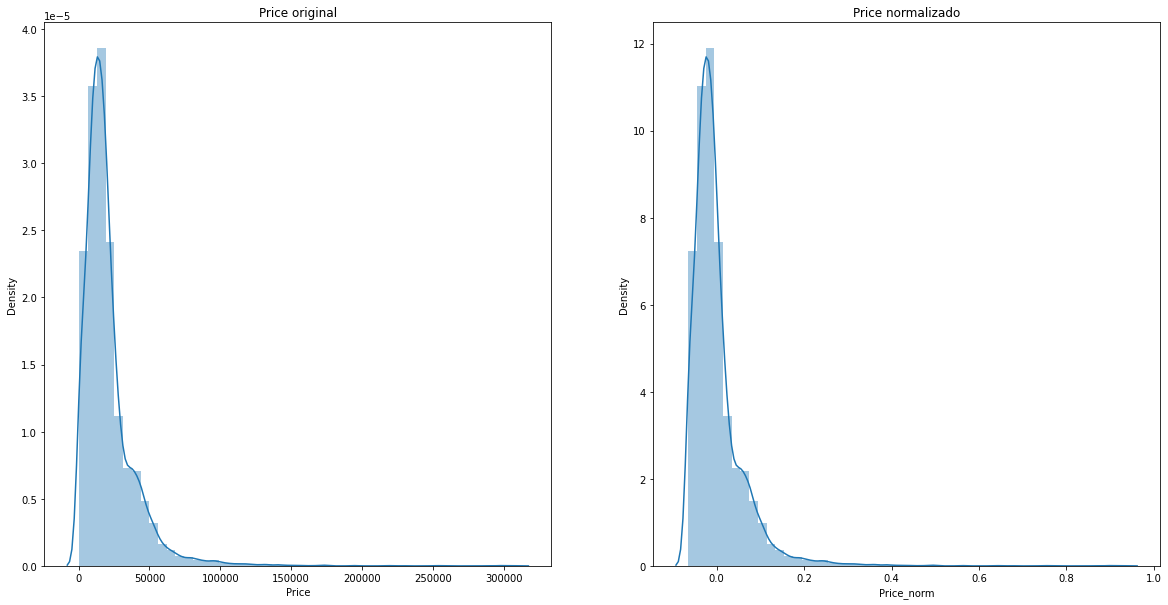

In [186]:
fig, axes = plt.subplots(1, 2)

axes[0].set_title('Price original')
axes[1].set_title('Price normalizado')

sns.distplot(df['Price'] ,ax = axes[0])
sns.distplot(df["Price_norm"], ax = axes[1]);

In [187]:
kstest(df['Price_norm'], 'norm')

KstestResult(statistic=0.47381557341023756, pvalue=0.0)

P-value < 0.05. Rechazamos nuestra H0

### <font color=violet> Logarítmica

In [188]:
df["Price_log"] = df["Price"].apply(lambda x: np.log(x) if x > 0 else 0)

In [189]:
df.head(2)

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags,Price_norm,Price_log
0,13328,1399.0,LEXUS,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04,Silver,12,-0.024087,9.497622
1,16621,1018.0,CHEVROLET,2011,Jeep,No,Petrol,3,192000.0,6.0,Tiptronic,4x4,04,Black,8,-0.013410,9.718422


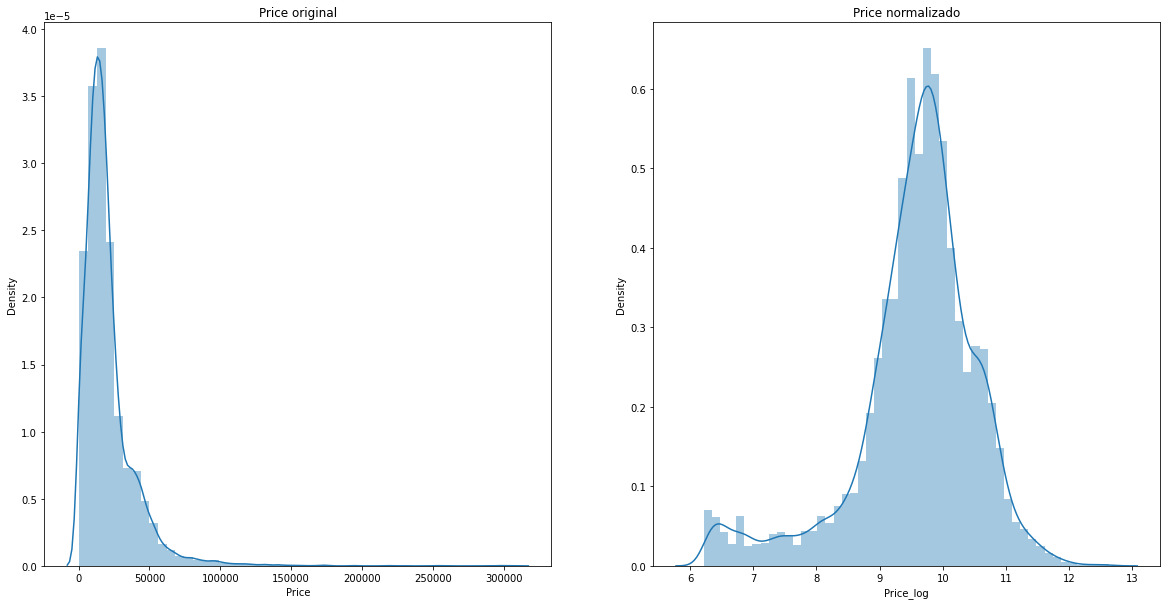

In [190]:
fig, axes = plt.subplots(1, 2)

axes[0].set_title('Price original')
axes[1].set_title('Price normalizado')

sns.distplot(df['Price'] ,ax = axes[0])
sns.distplot(df["Price_log"], ax = axes[1]);

In [191]:
kstest(df['Price_log'], 'norm')

KstestResult(statistic=0.9999999997427355, pvalue=0.0)

P-value < 0.05. Rechazamos nuestra H0

### <font color=violet> Raíz cuadrada

In [192]:
df["Price_raiz"] = df["Price"].apply(lambda x: math.sqrt(x))

In [193]:
df.head(2)

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags,Price_norm,Price_log,Price_raiz
0,13328,1399.0,LEXUS,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04,Silver,12,-0.024087,9.497622,115.446958
1,16621,1018.0,CHEVROLET,2011,Jeep,No,Petrol,3,192000.0,6.0,Tiptronic,4x4,04,Black,8,-0.013410,9.718422,128.922457


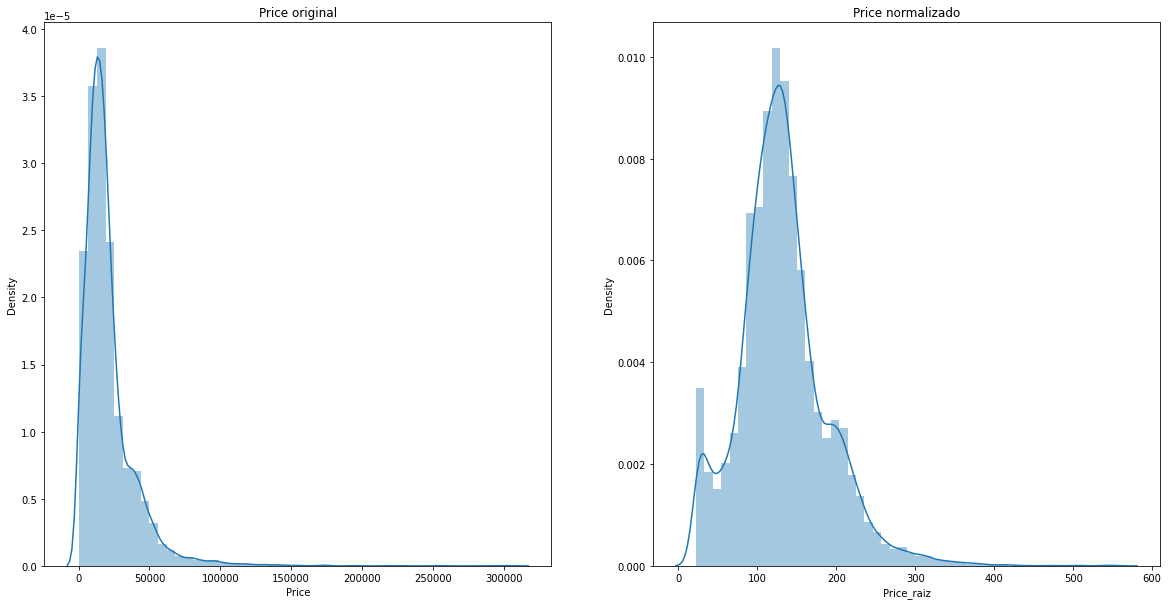

In [194]:
fig, axes = plt.subplots(1, 2)

axes[0].set_title('Price original')
axes[1].set_title('Price normalizado')

sns.distplot(df['Price'] ,ax = axes[0])
sns.distplot(df["Price_raiz"], ax = axes[1]);

In [195]:
kstest(df['Price_raiz'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

P-value < 0.05. Rechazamos nuestra H0

### <font color=violet> Stats.boxcox()

In [196]:
df['Price_box'], lambda_ajustada = stats.boxcox(df['Price'])

In [197]:
df.head(2)

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags,Price_norm,Price_log,Price_raiz,Price_box
0,13328,1399.0,LEXUS,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04,Silver,12,-0.024087,9.497622,115.446958,50.621089
1,16621,1018.0,CHEVROLET,2011,Jeep,No,Petrol,3,192000.0,6.0,Tiptronic,4x4,04,Black,8,-0.013410,9.718422,128.922457,54.192853


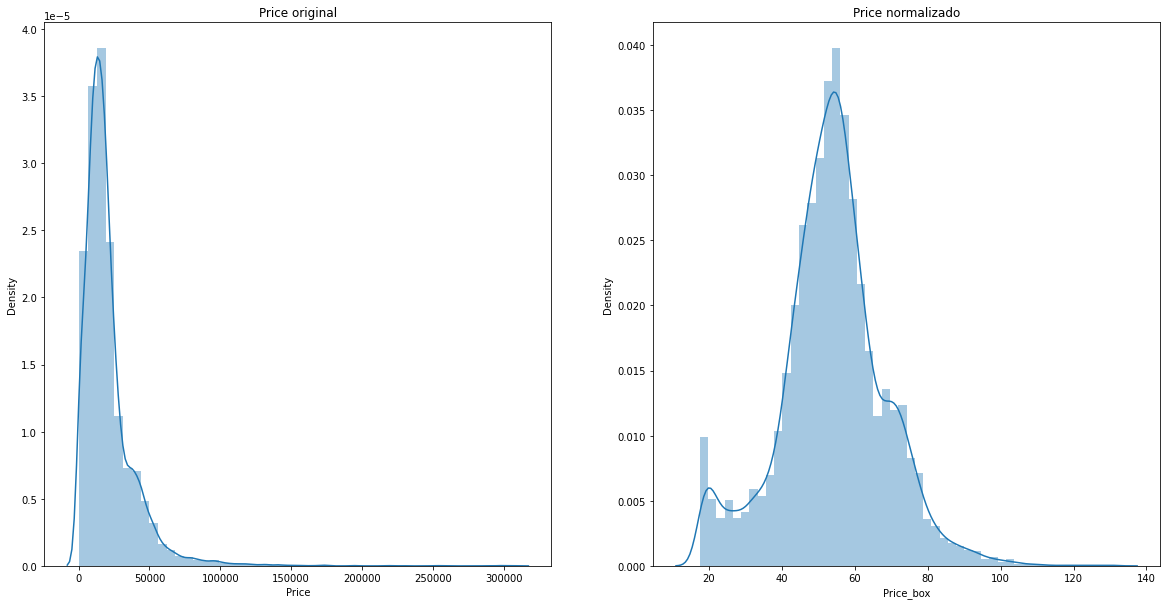

In [198]:
fig, axes = plt.subplots(1, 2)

axes[0].set_title('Price original')
axes[1].set_title('Price normalizado')

sns.distplot(df['Price'] ,ax = axes[0])
sns.distplot(df["Price_box"], ax = axes[1]);

In [199]:
kstest(df['Price_box'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

P-value < 0.05. Rechazamos nuestra H0

### <font color=violet> Sklearn MinMaxScaller

In [200]:
numericas = df.select_dtypes(include = np.number)

In [201]:
numericas

,Price,Levy,Prod. year,Mileage,Cylinders,Airbags,Price_norm,Price_log,Price_raiz,Price_box
0,13328,1399.0,2010,186005.0,6.0,12,-0.024087,9.497622,115.446958,50.621089
1,16621,1018.0,2011,192000.0,6.0,8,-0.013410,9.718422,128.922457,54.192853
2,8467,0.0,2006,200000.0,4.0,2,-0.039849,9.043932,92.016303,43.961419
3,3607,862.0,2011,168966.0,4.0,0,-0.055607,8.190632,60.058305,33.577312
4,11726,446.0,2014,91901.0,4.0,4,-0.029282,9.369564,108.286657,48.651853
...,...,...,...,...,...,...,...,...,...,...
19224,19130,0.0,2014,35800.0,4.0,12,-0.005274,9.859013,138.311243,56.589095
19225,8781,1107.0,2007,236000.0,4.0,4,-0.038831,9.080346,93.706990,44.464226
19226,7840,0.0,2003,220000.0,6.0,0,-0.041882,8.966994,88.543774,42.916345
19233,15681,831.0,2011,161600.0,4.0,8,-0.016458,9.660205,125.223800,53.228817


In [202]:
minmax = MinMaxScaler()

In [203]:
minmax.fit(df[['Price']])

MinMaxScaler()

In [204]:
X_normalizadas = minmax.transform(df[["Price"]])

In [205]:
X_normalizadas.min(axis=0)

array([0.])

In [206]:
X_normalizadas.max(axis=0)

array([1.])

In [207]:
numericas_minmax = pd.DataFrame(X_normalizadas, columns = ["Price_Sklearn"])
numericas_minmax

,Price_Sklearn
0,0.041595
1,0.052272
2,0.025833
3,0.010074
4,0.036400
...,...
13579,0.060407
13580,0.026851
13581,0.023800
13582,0.049224


In [208]:
df["Price_Sklearn"] = numericas_minmax
df.head(2)

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags,Price_norm,Price_log,Price_raiz,Price_box,Price_Sklearn
0,13328,1399.0,LEXUS,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04,Silver,12,-0.024087,9.497622,115.446958,50.621089,0.041595
1,16621,1018.0,CHEVROLET,2011,Jeep,No,Petrol,3,192000.0,6.0,Tiptronic,4x4,04,Black,8,-0.013410,9.718422,128.922457,54.192853,0.052272


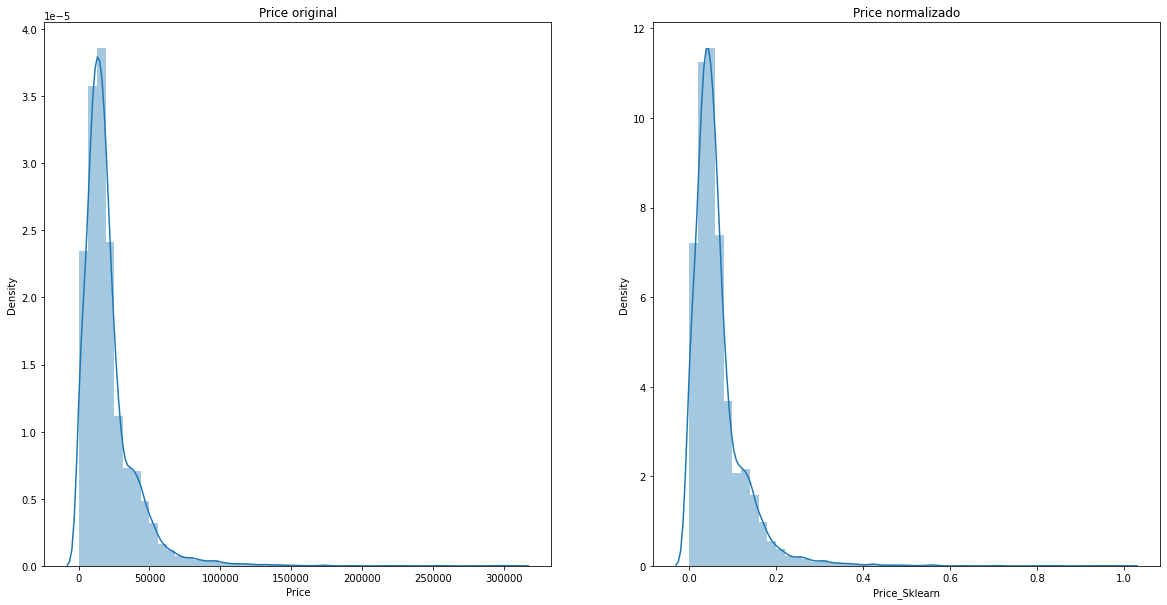

In [209]:
fig, axes = plt.subplots(1, 2)

axes[0].set_title('Price original')
axes[1].set_title('Price normalizado')

sns.distplot(df['Price'], ax = axes[0])
sns.distplot(df['Price_Sklearn'], ax = axes[1]);

In [210]:
kstest(df['Price_Sklearn'], 'norm') 

KstestResult(statistic=nan, pvalue=nan)

Luego de aplicar los métodos de Normalización hemos visto que en ninguna de las transformaciones hemos cumplido nuestro objetivo de que nuestros datos sean normales. Esto es algo normal, escogeremos la transformación que más se ha ajustado a la campana de Gauss visualmente. En nuestro caso, ha sido la transformación logarítmica. 


Dropeamos las columnas de precios normalizados que no vamos a usar.

In [211]:
df.drop(['Price_norm', 'Price_Sklearn', 'Price_box', 'Price_raiz' ], axis = 1, inplace = True)

In [212]:
df.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags,Price_log
0,13328,1399.0,LEXUS,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04,Silver,12,9.497622
1,16621,1018.0,CHEVROLET,2011,Jeep,No,Petrol,3,192000.0,6.0,Tiptronic,4x4,04,Black,8,9.718422
2,8467,0.0,HONDA,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04,Black,2,9.043932
3,3607,862.0,FORD,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04,White,0,8.190632
4,11726,446.0,HONDA,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04,Silver,4,9.369564


In [213]:
df.describe()

,Price,Levy,Prod. year,Mileage,Cylinders,Airbags,Price_log
count,13584.000000,13584.000000,13584.000000,1.358400e+04,13584.000000,13584.000000,13584.000000
mean,20756.667329,581.027664,2011.728578,1.468467e+05,4.460247,6.733657,9.567687
std,19024.644961,462.942608,4.203401,1.651380e+05,1.119606,3.961573,0.982023
min,500.000000,0.000000,2001.000000,0.000000e+00,1.000000,0.000000,6.214608
25%,9885.750000,0.000000,2010.000000,6.800000e+04,4.000000,4.000000,9.198850
50%,16308.000000,640.000000,2012.000000,1.193865e+05,4.000000,6.000000,9.699411
75%,25089.000000,880.000000,2015.000000,1.731012e+05,4.000000,12.000000,10.130185
max,308906.000000,2151.000000,2020.000000,1.019978e+06,16.000000,16.000000,12.640792


##### <font color=green> Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [214]:
df.to_pickle('datos/cars_price3.pkl')

In [215]:
df.to_csv('datos/cars_price3.csv')